In [7]:
library(Seurat)
library(lisi)
library(cluster)
library(FNN)

In [13]:
dirs="/data02/tguo/space_batch_effect/simulate/"
batch_sim="_1"
types="_types4"
B=2
embed1_file=paste(dirs,"gtt_output/AGC_embed",batch_sim,types,"_xent.csv",sep="")
embed2_file=paste(dirs,"methods/scidrl_mat",batch_sim,types,".csv",sep="")
embed3_file=paste(dirs,"methods/seurat_mat",batch_sim,types,".csv",sep="")
embed4_file=paste(dirs,"methods/harmony_mat",batch_sim,types,".csv",sep="")
embed5_file=paste(dirs,"methods/harmony_SEDR_mat",batch_sim,types,".txt",sep="")
embed6_file=paste(dirs,"methods/harmony_STAGATE_mat",batch_sim,types,".txt",sep="")
meta_file=c()
coord_file=c()
for(i in 1:B){
    meta_file=c(meta_file,paste(dirs,"gtt_input/meta",i,batch_sim,types,".csv",sep=""))
    coord_file=c(coord_file,paste(dirs,"gtt_input/coord",i,batch_sim,types,".csv",sep=""))
}
flags=paste(batch_sim,types,sep='')

In [78]:
# dirs="/data02/tguo/space_batch_effect/human_DLPFC_10x/"
# sample_names=c('151507','151508','151509','151510','151669','151670','151671','151672','151673','151674','151675','151676')
# samples=sample_names[c(1,9)]
# flags=''
# for(i in 1:length(samples)){flags=paste(flags,'_',samples[i],sep='')}
# flags1=samples[1];for(i in 2:length(samples)){flags1=paste(flags1,'-',samples[i],sep='')}
# embed1_file=paste(dirs,"gtt_output/AGC_embed",flags,"_xent.csv",sep="")
# embed2_file=paste(dirs,"methods/scidrl_mat",flags,".csv",sep="")
# embed3_file=paste(dirs,"methods/seurat_mat",flags,".txt",sep="")
# embed4_file=paste(dirs,"methods/harmony_mat",flags,".txt",sep="")
# embed5_file=paste(dirs,"methods/harmony_SEDR_mat",flags,".txt",sep="")
# embed6_file=paste(dirs,"methods/harmony_STAGATE_mat",flags,".txt",sep="")
# meta_file=c()
# mat_file=c()
# coord_file=c()
# for(i in 1:length(samples)){
#     meta_file=c(meta_file,paste(dirs,"gtt_input_scanpy/",flags1,'_',samples[i],"_label.txt",sep=""))
#     coord_file=c(coord_file,paste(dirs,"gtt_input_scanpy/",flags1,'_',samples[i],"_positions.txt",sep=""))
# }

In [38]:
# dirs="/data02/tguo/space_batch_effect/mouse_brain/"
# samples=c("all_posterior1","all_posterior2","all_anterior1","all_anterior2")
# # samples=c("anterior1","anterior2")
# flags=''
# for(i in 1:length(samples)){flags=paste(flags,'_',samples[i],sep='')}
# embed1_file=paste(dirs,"gtt_output/AGC_embed",flags,"_xent.csv",sep="")
# embed2_file=paste(dirs,"methods/scidrl_mat",flags,".csv",sep="")
# embed3_file=paste(dirs,"methods/seurat_mat",flags,".txt",sep="")
# embed4_file=paste(dirs,"methods/harmony_mat",flags,".txt",sep="")
# embed5_file=paste(dirs,"methods/harmony_SEDR_mat",flags,".txt",sep="")
# embed6_file=paste(dirs,"methods/harmony_STAGATE_mat",flags,".txt",sep="")
# meta_file=c()
# mat_file=c()
# coord_file=c()
# for(i in 1:length(samples)){
#     meta_file=c(meta_file,paste(dirs,"gtt_input/",samples[i],"_meta.csv",sep=""))
#     coord_file=c(coord_file,paste(dirs,"gtt_input/",samples[i],"_coord.csv",sep=""))
# }

In [74]:
# dirs="/data02/tguo/space_batch_effect/Hippo/"
# samples=c("10X_Normal","10X_DAPI","10X_FFPE")
# flags=''
# for(i in 1:length(samples)){flags=paste(flags,'_',samples[i],sep='')}
# embed1_file=paste(dirs,"gtt_output/AGC_embed",flags,"_xent.csv",sep="")
# embed3_file=paste(dirs,"methods/seurat_mat",flags,".txt",sep="")
# embed4_file=paste(dirs,"methods/harmony_mat",flags,".txt",sep="")
# embed5_file=paste(dirs,"methods/harmony_SEDR_mat",flags,".txt",sep="")
# embed6_file=paste(dirs,"methods/harmony_STAGATE_mat",flags,".txt",sep="")
# meta_file=c()
# mat_file=c()
# coord_file=c()
# for(i in 1:length(samples)){
#     meta_file=c(meta_file,paste(dirs,"gtt_input/",samples[i],"_meta.csv",sep=""))
#     coord_file=c(coord_file,paste(dirs,"gtt_input/",samples[i],"_coord.csv",sep=""))
# }

In [2]:
# dirs="/data02/tguo/space_batch_effect/mouse_OB/"
# samples=c("BGI","SlideV2")
# flags=''
# for(i in 1:length(samples)){flags=paste(flags,'_',samples[i],sep='')}
# embed1_file=paste(dirs,"gtt_output/AGC_embed",flags,"_xent.csv",sep="")
# embed3_file=paste(dirs,"methods/seurat_mat",flags,".txt",sep="")
# embed4_file=paste(dirs,"methods/harmony_mat",flags,".txt",sep="")
# embed5_file=paste(dirs,"methods/harmony_SEDR_mat",flags,".txt",sep="")
# embed6_file=paste(dirs,"methods/harmony_STAGATE_mat",flags,".txt",sep="")
# meta_file=c()
# mat_file=c()
# coord_file=c()
# for(i in 1:length(samples)){
#     meta_file=c(meta_file,paste(dirs,"gtt_input/",samples[i],"_meta.csv",sep=""))
#     coord_file=c(coord_file,paste(dirs,"gtt_input/",samples[i],"_coord.csv",sep=""))
# }

In [15]:
embed1=read.csv(embed1_file,header=T,row.names=1,sep=',')
# embed2=read.csv(embed2_file,header=T,row.names=1,sep=',')
embed3=read.csv(embed3_file,header=T,row.names=1,sep=',')
embed4=read.csv(embed4_file,header=T,row.names=1,sep=',')
embed5=read.csv(embed5_file,header=T,row.names=1,sep=',')
embed6=read.csv(embed6_file,header=T,row.names=1,sep=',')
meta=read.csv(meta_file[1],header=T,row.names=1,sep=',')
for(i in 2:length(meta_file)){
    meta<-rbind(meta,read.csv(meta_file[i],header=T,row.names=1,sep=','))
}
embed1=embed1[rownames(meta),]
# embed2=embed2[rownames(meta),]
embed3=embed3[rownames(meta),]
embed4=embed4[rownames(meta),]
embed5=embed5[rownames(meta),]
embed6=embed6[rownames(meta),]
if(dim(embed1)[2]==16){
    znoise_dim=3}else{
    znoise_dim=5
}
# # if(length(which('celltype_new'%in%colnames(meta)))>0){
# #     meta$celltype=meta$celltype_new
# # }
# meta$celltype[meta$celltype=='SEZ']='GCL'
# meta$celltype[meta$celltype=='Meninges']='ONL'
# meta$celltype[meta$celltype=='OPL']='EPL'
# # meta$celltype[meta$celltype=='GCL_1']='GCL'
# # meta$celltype[meta$celltype=='GCL_2']='GCL'
# # meta$celltype[meta$celltype=='GL_1']='GL'
# # meta$celltype[meta$celltype=='GL_2']='GL'
# idx=which(meta$celltype!='Low_Quality')
# embed1=embed1[idx,]
# embed3=embed3[idx,]
# embed4=embed4[idx,]
# embed5=embed5[idx,]
# embed6=embed6[idx,]
# meta=meta[idx,]

In [26]:
# batch_value<-read.csv(paste(dirs,"metrics/LISI_batch_",flags,".csv",sep=""),header=T,row.names=1,sep=',')
# cell_value<-read.csv(paste(dirs,"metrics/LISI_cell_",flags,".csv",sep=""),header=T,row.names=1,sep=',')
# cell_sil<-read.csv(paste(dirs,"metrics/SIL_cell_",flags,".csv",sep=""),header=T,row.names=1,sep=',')
# library(ggplot2)
# ggplot(batch_value,aes(x=reorder(method,lisi_score,median),y=lisi_score))+geom_boxplot(aes(fill=method))
# ggplot(cell_value,aes(x=reorder(method,-lisi_score,median),y=lisi_score))+geom_boxplot(aes(fill=method))
# ggplot(cell_sil,aes(x=reorder(method,sil_score,median),y=sil_score))+geom_boxplot(aes(fill=method))
# EPS=1e-10
# names=intersect(rownames(cell_value),rownames(batch_value))
# batch_value=batch_value[names,]
# cell_value=cell_value[names,]
# lisi_com=batch_value
# for(m in unique(batch_value$method)){
#     idx=which(batch_value$method==m)
#     b=(batch_value[idx,1]-min(batch_value[idx,1]))/(max(batch_value[idx,1])-min(batch_value[idx,1]))
#     a=(cell_value[idx,1]-min(cell_value[idx,1]))/(max(cell_value[idx,1])-min(cell_value[idx,1]))
#     lisi_com[idx,1]=((1/(a+EPS))*b)/((1/(a+EPS))+b)*2
# }
# write.csv(lisi_com,paste(dirs,"metrics/LISI_com_",flags,".csv",sep=""))
# ggplot(lisi_com,aes(x=reorder(method,lisi_score,median),y=lisi_score))+geom_boxplot(aes(fill=method))

In [ ]:
# # ######batch指标#######
# batch_value<-read.csv(paste(dirs,"metrics/LISI_batch_",flags,".csv",sep=""),header=T,row.names=1,sep=',')
# cell_value<-read.csv(paste(dirs,"metrics/LISI_cell_",flags,".csv",sep=""),header=T,row.names=1,sep=',')
# cell_sil<-read.csv(paste(dirs,"metrics/SIL_cell_",flags,".csv",sep=""),header=T,row.names=1,sep=',')
# library(ggplot2)
# ggplot(batch_value,aes(x=reorder(method,lisi_score,median),y=lisi_score))+geom_boxplot(aes(fill=method))
# ggplot(cell_value,aes(x=reorder(method,-lisi_score,median),y=lisi_score))+geom_boxplot(aes(fill=method))
# ggplot(cell_sil,aes(x=reorder(method,sil_score,median),y=sil_score))+geom_boxplot(aes(fill=method))

# #######domain指标########
# # ari_leiden<-read.csv(paste(dirs,"metrics/ARI_leiden",flags,".csv",sep=""),header=T,row.names=1,sep=',')
# # ari_mclust<-read.csv(paste(dirs,"metrics/ARI_mclust",flags,".csv",sep=""),header=T,row.names=1,sep=',')
# # ari_leiden$metrics='Leiden'
# # ari_mclust$metrics='mClust'
# # colnames(ari_leiden)[2]='ARI'
# # colnames(ari_mclust)[2]='ARI'
# # ari<-rbind(ari_leiden,ari_mclust)
# # ggplot(ari_leiden,aes(method,ARI,fill=method))+geom_bar(position="dodge", stat="identity")

去批次

In [16]:
lisi_batch<-function(D,M,nn,method){
    uc=unique(M$celltype)
    value=data.frame(lisi_score=0,celltype=0,batch=0)
    for(i in 1:length(uc)){
        idx=which(M$celltype==uc[i])
        meta=M[idx,]
        data=D[idx,]
        ub=unique(meta$batch)
        if(length(ub)>1){
            if(dim(data)[1]<nn*3){nn=dim(data)[1]%/%3}
            a=compute_lisi(data,meta,"batch",perplexity=nn)
            colnames(a)<-'lisi_score'
            a$celltype=uc[i]
            a$batch=meta$batch
            value<-rbind(value,a)
        }
    }
    value<-value[-1,]
    value$method<-method
   return(value)
}
lisi_cell<-function(D,M,nn,method){
    lisi_celltype<-compute_lisi(D, M, 'celltype', perplexity=nn)
    lisi_celltype<-data.frame(lisi_score=lisi_celltype[,1],celltype=M$celltype,batch=M$batch,method=method)
    rownames(lisi_celltype)<-rownames(M)
    return(lisi_celltype)
}
silhoutte_cell<-function(mat,meta,method){
    dis =dist(mat, method="euclidean", diag = FALSE, upper = FALSE, p = 2)
    sil = silhouette(unclass(as.factor(meta$celltype)),as.matrix(dis))
    sil=data.frame(sil_score=sil[,3],celltype=meta$celltype,batch=meta$batch,method=method)
    return(sil)
}

In [17]:
nn=30
batch_value1=lisi_batch(embed1[,znoise_dim:dim(embed1)[2]],meta,nn,'GraphSCIDRL')
batch_value3=lisi_batch(embed3,meta,nn,'seurat')
batch_value4=lisi_batch(embed4,meta,nn,'harmony')
batch_value5=lisi_batch(embed5,meta,nn,'harmony_SEDR')
batch_value6=lisi_batch(embed6,meta,nn,'harmony_STAGATE')
cell_value1=lisi_cell(embed1[,znoise_dim:dim(embed1)[2]],meta,nn,'GraphSCIDRL')
cell_value3=lisi_cell(embed3,meta,nn,'seurat')
cell_value4=lisi_cell(embed4,meta,nn,'harmony')
cell_value5=lisi_cell(embed5,meta,nn,'harmony_SEDR')
cell_value6=lisi_cell(embed6,meta,nn,'harmony_STAGATE')
cell_sil1=silhoutte_cell(embed1[,znoise_dim:dim(embed1)[2]],meta,'GraphSCIDRL')
cell_sil3=silhoutte_cell(embed3,meta,'seurat')
cell_sil4=silhoutte_cell(embed4,meta,'harmony')
cell_sil5=silhoutte_cell(embed5,meta,'harmony_SEDR')
cell_sil6=silhoutte_cell(embed6,meta,'harmony_STAGATE')

# batch_value2=lisi_batch(embed2[,3:dim(embed2)[2]],meta,nn,'SCIDRL')
# cell_value2=lisi_cell(embed2[,3:dim(embed2)[2]],meta,nn,'SCIDRL')
# cell_sil2=silhoutte_cell(embed2[,3:dim(embed2)[2]],meta,'SCIDRL')

batch_value=rbind(batch_value1,batch_value3,batch_value4,batch_value5,batch_value6)
cell_value=rbind(cell_value1,cell_value3,cell_value4,cell_value5,cell_value6)
cell_sil=rbind(cell_sil1,cell_sil3,cell_sil4,cell_sil5,cell_sil6)

write.csv(batch_value,paste(dirs,"metrics/LISI_batch",flags,".csv",sep=""))
write.csv(cell_value,paste(dirs,"metrics/LISI_cell",flags,".csv",sep=""))
write.csv(cell_sil,paste(dirs,"metrics/SIL_cell",flags,".csv",sep=""))
EPS=1e-10
names=intersect(rownames(cell_value),rownames(batch_value))
batch_value=batch_value[names,]
cell_value=cell_value[names,]
lisi_com=batch_value
for(m in unique(batch_value$method)){
    idx=which(batch_value$method==m)
    b=(batch_value[idx,1]-min(batch_value[idx,1]))/(max(batch_value[idx,1])-min(batch_value[idx,1]))
    a=(cell_value[idx,1]-min(cell_value[idx,1]))/(max(cell_value[idx,1])-min(cell_value[idx,1]))
    lisi_com[idx,1]=((1/(a+EPS))*b)/((1/(a+EPS))+b)*2
}
write.csv(lisi_com,paste(dirs,"metrics/LISI_com",flags,".csv",sep=""))

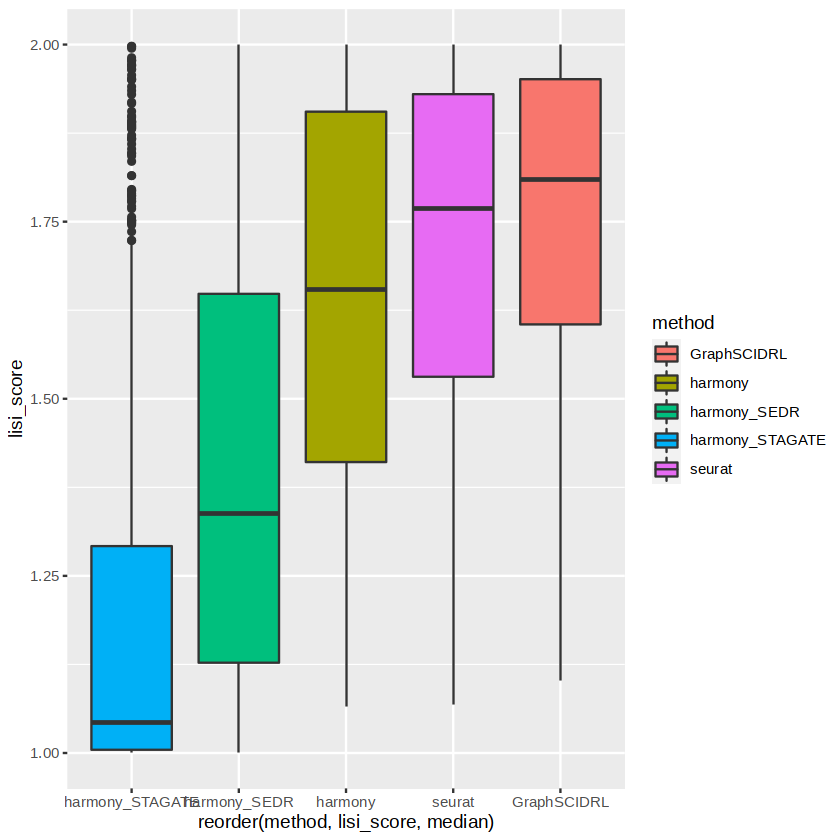

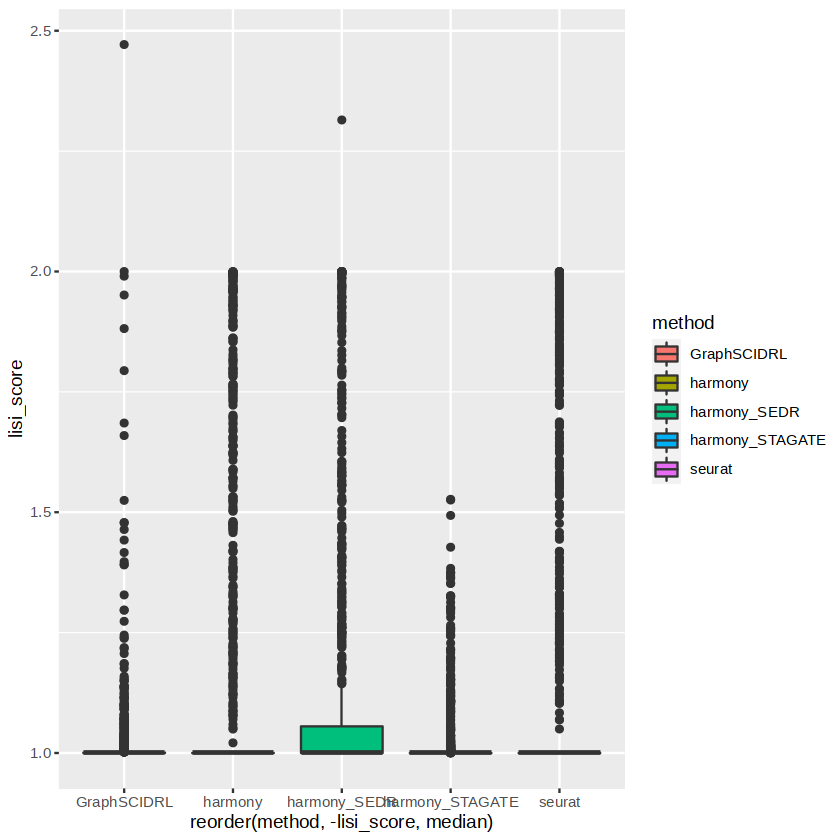

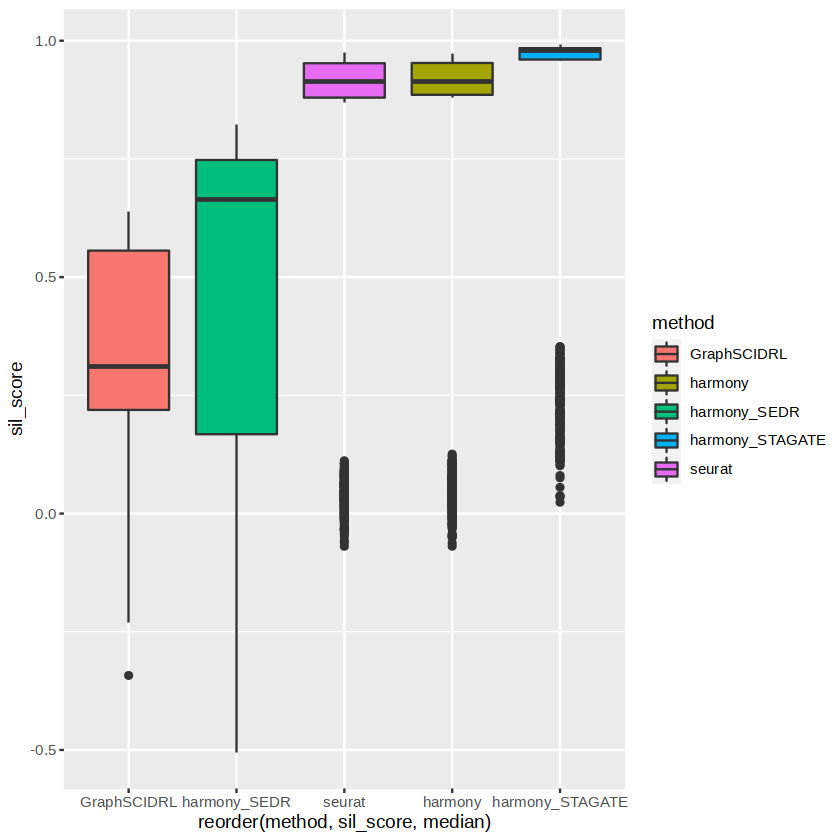

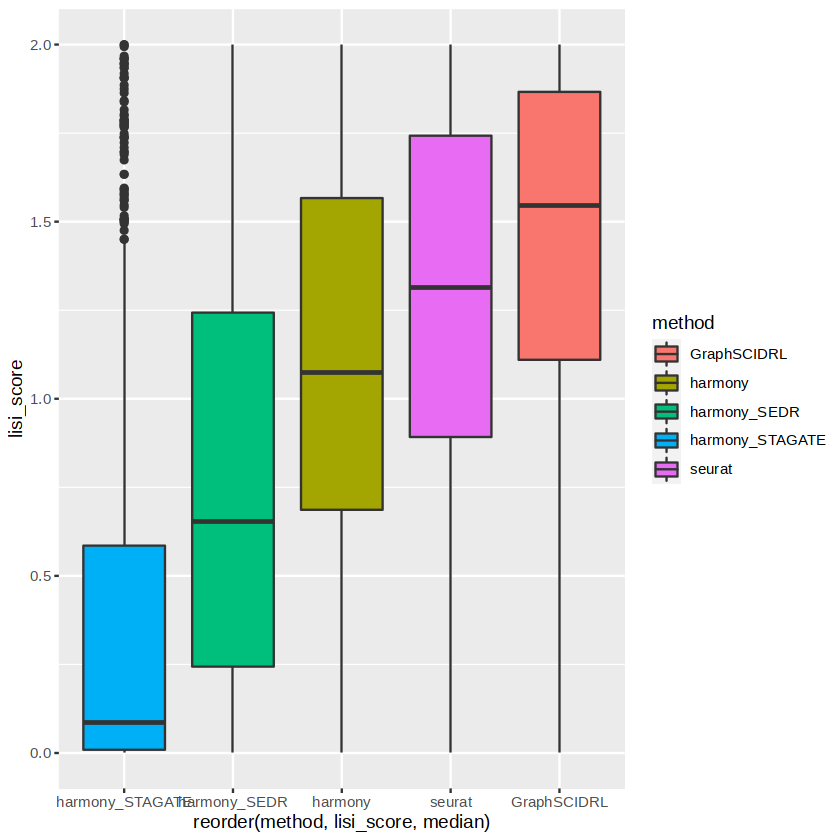

In [18]:
# batch_value<-read.csv(paste(dirs,"metrics/LISI_batch_",flags,".csv",sep=""),header=T,row.names=1,sep=',')
# cell_value<-read.csv(paste(dirs,"metrics/LISI_cell_",flags,".csv",sep=""),header=T,row.names=1,sep=',')
# cell_sil<-read.csv(paste(dirs,"metrics/SIL_cell_",flags,".csv",sep=""),header=T,row.names=1,sep=',')
library(ggplot2)
ggplot(batch_value,aes(x=reorder(method,lisi_score,median),y=lisi_score))+geom_boxplot(aes(fill=method))
ggplot(cell_value,aes(x=reorder(method,-lisi_score,median),y=lisi_score))+geom_boxplot(aes(fill=method))
ggplot(cell_sil,aes(x=reorder(method,sil_score,median),y=sil_score))+geom_boxplot(aes(fill=method))
ggplot(lisi_com,aes(x=reorder(method,lisi_score,median),y=lisi_score))+geom_boxplot(aes(fill=method))

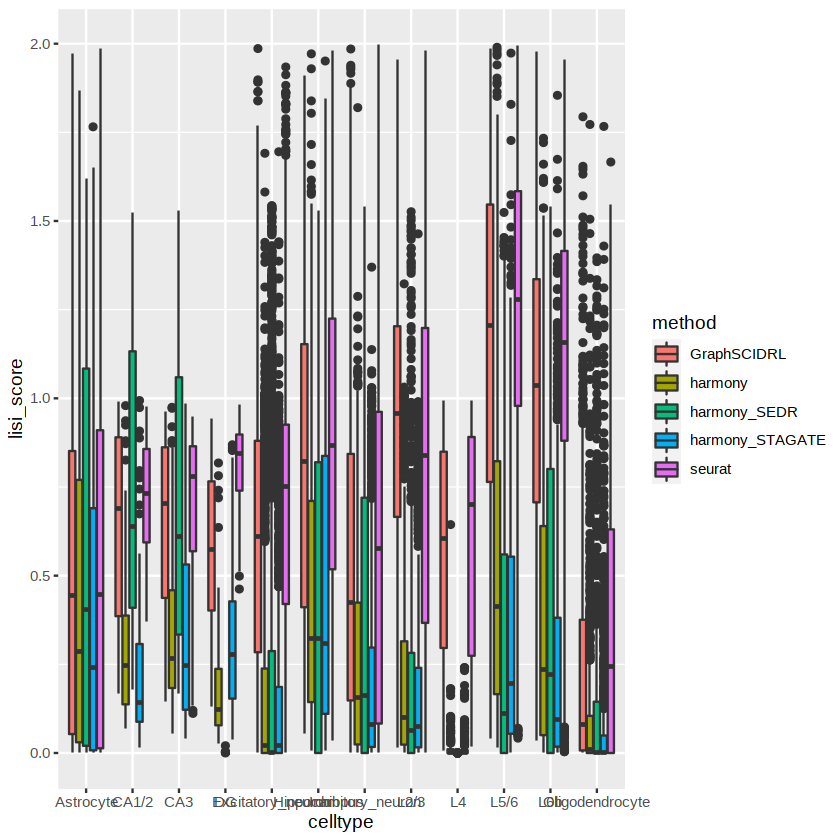

In [79]:
ggplot(lisi_com,aes(x=celltype,y=lisi_score))+geom_boxplot(aes(fill=method))

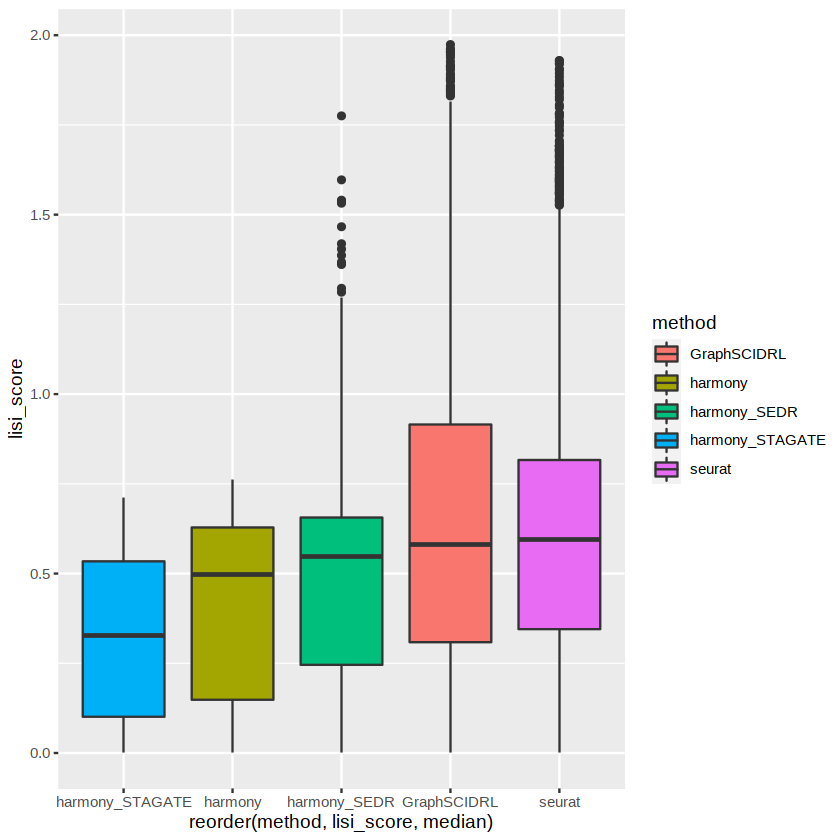

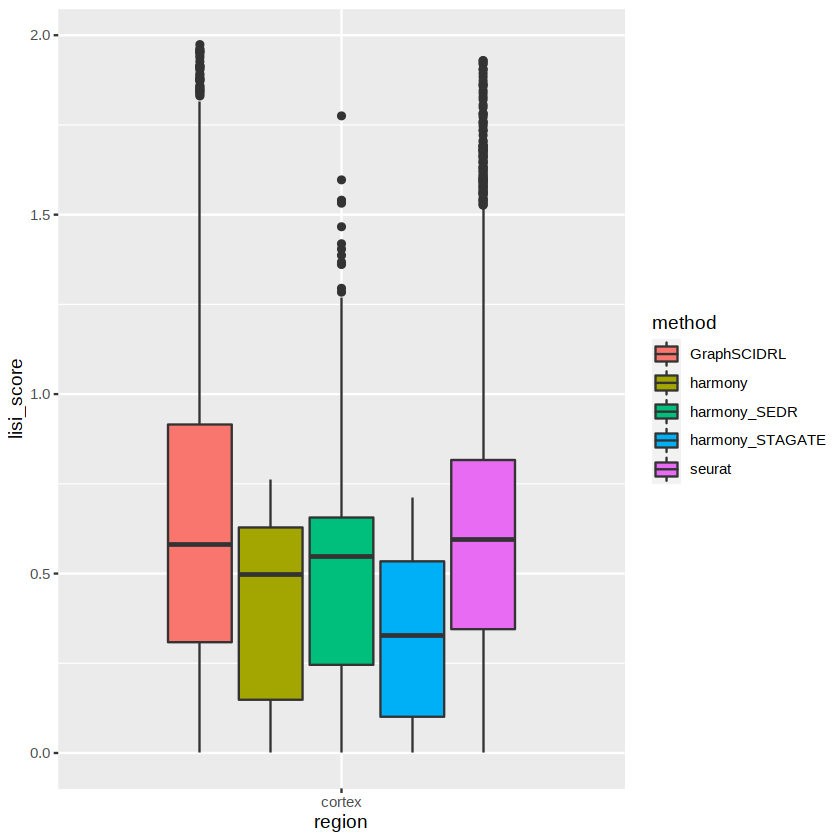

In [73]:
# meta$region=meta$celltype
# meta$region[meta$celltype%in%c('L2/3','L5/6','L6b','L2/3','L4','L5')]='cortex'
# lisi_com$region=lisi_com$celltype
# lisi_com$region[lisi_com$celltype%in%c('L2/3','L5/6','L6b','L2/3','L4','L5')]='cortex'
# cc=intersect(meta$region[meta$batch==ub[1]],meta$region[meta$batch==ub[3]])
# lisi_com1=lisi_com[lisi_com$region%in%'cortex',]
# ggplot(lisi_com1,aes(x=reorder(method,lisi_score,median),y=lisi_score))+geom_boxplot(aes(fill=method))
# ggplot(lisi_com1,aes(x=region,y=lisi_score))+geom_boxplot(aes(fill=method))
# # write.csv(lisi_com1,paste(dirs,"metrics/LISI_com",flags,".csv",sep=""))

位置匹配:每个细胞空间邻近的细胞类型的数量

In [33]:
spa_stat<-function(new_coord,knn,method){
    index=get.knn(new_coord[,1:2],knn)$nn.index
    stat=data.frame(num=0,entropy=0)
    for(i in 1:dim(index)[1]){
        c1=new_coord$celltype[i]
        c2=new_coord$celltype[index[i,]]
        freqs=table(c2)/length(c2)
        ent=-sum(freqs * log2(freqs))
        if(is.nan(ent)){ent=0.0}
        a=data.frame(num=length(unique(c2)),entropy=ent)
        stat=rbind(stat,a)
    }
    stat=stat[-1,]
    stat$method=method
    return(stat)
}

In [98]:
# dirs="/data02/tguo/space_batch_effect/human_DLPFC_10x/"
# sample_names=c('151507','151508','151509','151510','151669','151670','151671','151672','151673','151674','151675','151676')
# samples=sample_names
# flags=''
# for(i in 1:length(samples)){flags=paste(flags,'_',samples[i],sep='')}
clust_cate='_mclust'

In [14]:
# dirs="/data02/tguo/space_batch_effect/mouse_brain/"
# samples=c("all_posterior1","all_posterior2","all_anterior1","all_anterior2")
# # samples=c("anterior1","anterior2")
# flags=''
# for(i in 1:length(samples)){flags=paste(flags,'_',samples[i],sep='')}
# clust_cate='_mclust'

In [30]:
# dirs="/data02/tguo/space_batch_effect/simulate/"
# batch_sim="_1_2"
# types="_3batch_types5"
# flags=paste(batch_sim,types,sep='')
# clust_cate=''

In [61]:
# dirs="/data02/tguo/space_batch_effect/Hippo/"
# samples=c("10X_Normal","10X_DAPI","10X_FFPE")
# flags=''
# for(i in 1:length(samples)){flags=paste(flags,'_',samples[i],sep='')}
# clust_cate='_louvain'

In [31]:
dirs="/data02/tguo/space_batch_effect/mouse_OB/"
samples=c("BGI","SlideV2","10X")
flags=''
for(i in 1:length(samples)){flags=paste(flags,'_',samples[i],sep='')}
clust_cate='_louvain'

In [34]:
knn=10
new_coord1=read.csv(paste(dirs,"gtt_output/coordinate_file/gtt_new_coordinate",flags,clust_cate,".csv",sep=""),row.names=1)
new_coord2=read.csv(paste(dirs,"methods/paste_new_coord",flags,".csv",sep=""),row.names=1)
new_coord2$celltype=new_coord1[rownames(new_coord2),"celltype"]
new_coord2$batch=new_coord1[rownames(new_coord2),"batch"]
stat1=spa_stat(new_coord1,knn,"GraphSCIDRL")
stat2=spa_stat(new_coord2,knn,"PASTE")
stat=rbind(stat1,stat2)
stat[,2]<-exp(-stat[,2])
write.csv(stat,paste(dirs,"metrics/new_coordinate_STATS",flags,clust_cate,".csv",sep=""))

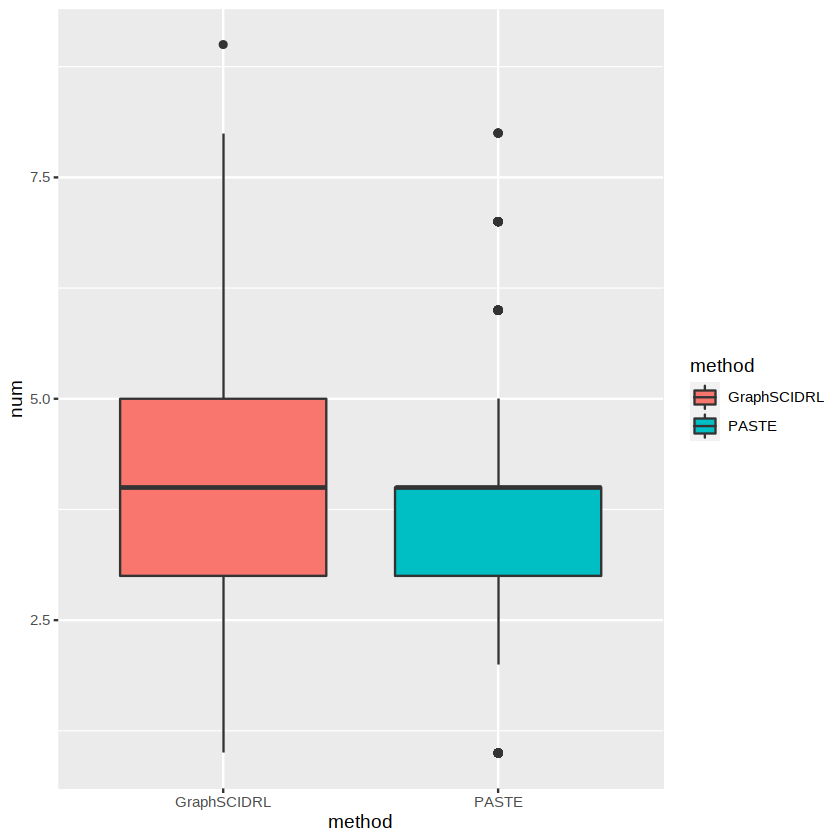

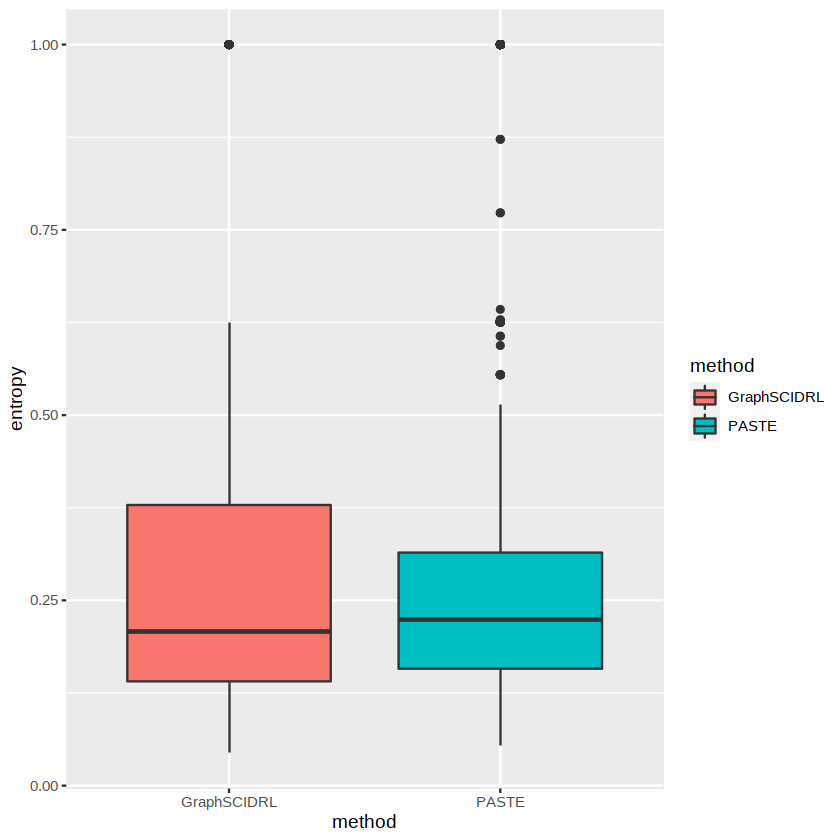

In [35]:
ggplot(stat,aes(x=method,y=num,fill=method))+geom_boxplot()
ggplot(stat,aes(x=method,y=entropy,fill=method))+geom_boxplot()

空间位置的保留程度

In [117]:
dirs="/data02/tguo/space_batch_effect/simulate/"
batch_sim="_1"
types="_types5"
flags=paste(batch_sim,types,sep='')
B=2

In [118]:
knn=20
coord_file=c()
for(i in 1:B){
    coord_file=c(coord_file,paste(dirs,"gtt_input/coord",i,batch_sim,types,".csv",sep=""))
}
coord=read.csv(coord_file[1],header=T,row.names=1,sep=',')
for(i in 2:length(coord_file)){
    coord=rbind(coord,read.csv(coord_file[i],header=T,row.names=1,sep=','))
}
coord=coord[,c('x','y')]
new_coord1=read.csv(paste(dirs,"gtt_output/coordinate_file/gtt_new_coordinate",flags,".csv",sep=""),row.names=1)
new_coord2=read.csv(paste(dirs,"methods/paste_new_coord",flags,".csv",sep=""),row.names=1)
new_coord1=new_coord1[rownames(coord),]
new_coord2=new_coord2[rownames(coord),]
index=get.knn(coord[,1:2],knn)$nn.index
index1=get.knn(new_coord1[,1:2],knn)$nn.index
index2=get.knn(new_coord2[,1:2],knn)$nn.index

In [119]:
stat=data.frame(freq=0,method=0)
for(i in 1:dim(index)[1]){
    stat=rbind(stat,data.frame(freq=length(intersect(index[i,],index1[i,]))/knn,method='GrpahSCIDRL'))
    stat=rbind(stat,data.frame(freq=length(intersect(index[i,],index2[i,]))/knn,method='PASTE'))
}
stat=stat[-1,]

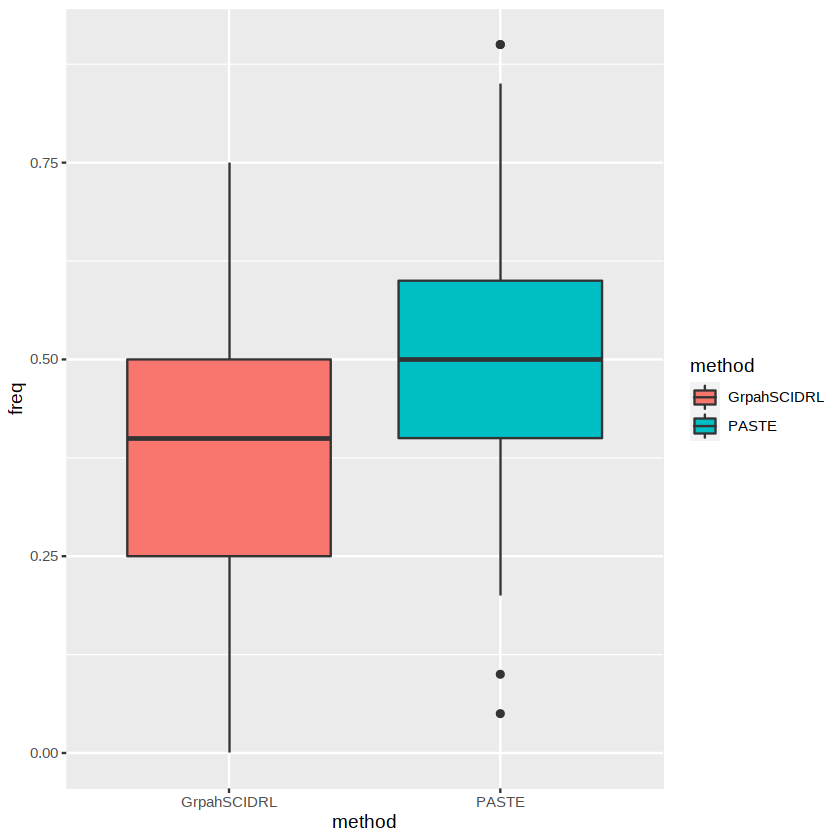

In [120]:
ggplot(stat,aes(x=method,y=freq,fill=method))+geom_boxplot()